1. 风格管理
   - 绘图风格设置
   - 颜色风格设置
2. 绘图方法
   - 数据集的分布可视化
   - 分类数据的可视化
   - 线性关系的可视化
3. 结构网格
   - 数据识别网络绘图
   
   ---

## 分类数据可视化
- 散点图
- 分布图
- 统计估算图

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

sns.set(style='whitegrid',color_codes=True)
np.random.seed(sum(map(ord,'catrgorical')))

titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

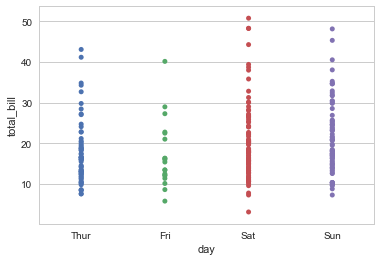

In [19]:
# 分类数据散点图
sns.stripplot(x='day',y='total_bill',data=tips)

In [17]:
#  将重合的点分散开

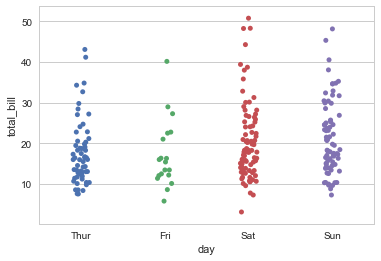

In [23]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

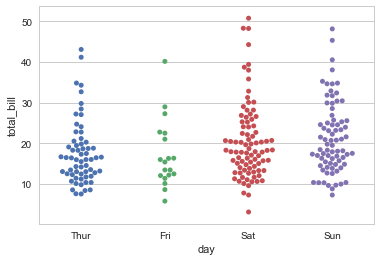

In [25]:
sns.swarmplot(x='day',y='total_bill',data=tips)

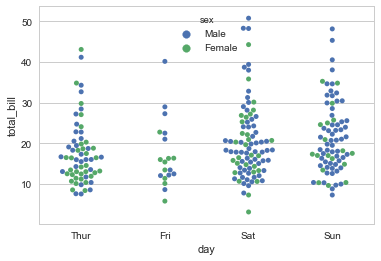

In [21]:
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips)

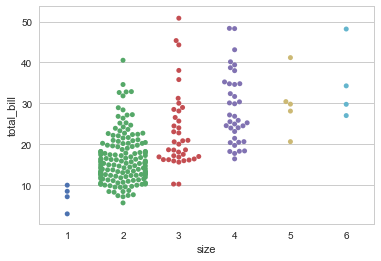

In [26]:
sns.swarmplot(x='size',y='total_bill',data=tips)

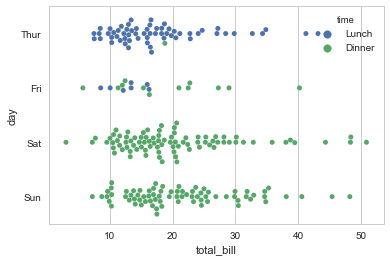

In [28]:
sns.swarmplot(x='total_bill',y='day',hue='time',data=tips)

### 数据分布图
---

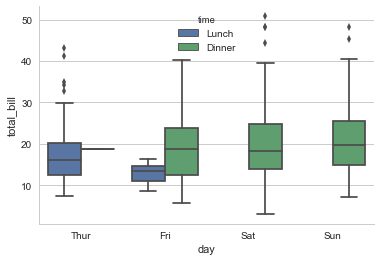

In [33]:
# 箱型图
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)

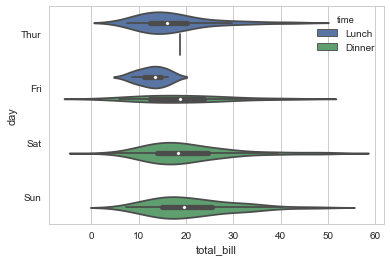

In [34]:
# 提琴图
sns.violinplot(x='total_bill',y='day',hue='time',data=tips)

In [35]:
# 提琴和箱型图结合

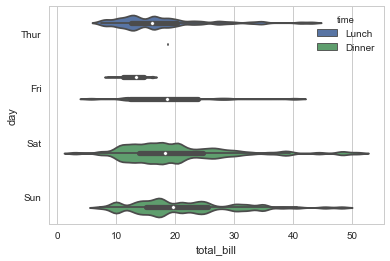

In [36]:
sns.violinplot(x='total_bill',y='day',hue='time',data=tips,bw=.1, scale='count', scale_hue=False)

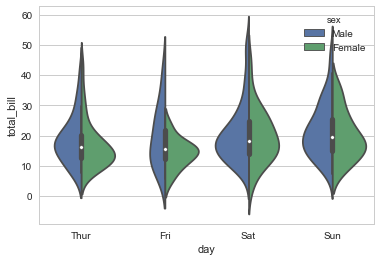

In [37]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,split=True)

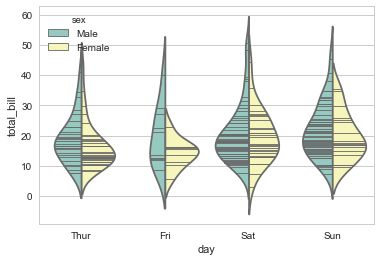

In [39]:
# 在提琴图内，也可以使用 inner 参数以横线的形式来展示每个观察点的分布，来代替箱型的整体分布：
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,split=True,inner='stick',palette='Set3')

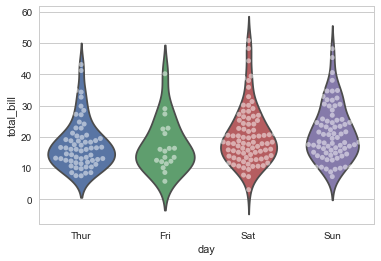

In [41]:
# 混用
sns.violinplot(x='day',y='total_bill',data=tips, inner=None)
sns.swarmplot(x='day',y='total_bill', data=tips, color='w',alpha=.5)

## 分类数据统计估计图


### 条形图


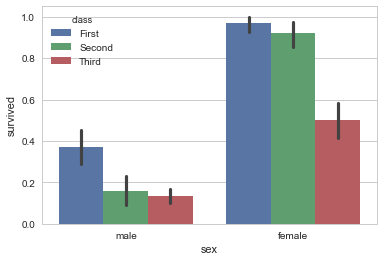

In [43]:
sns.barplot(x='sex',y='survived',hue='class',data=titanic)

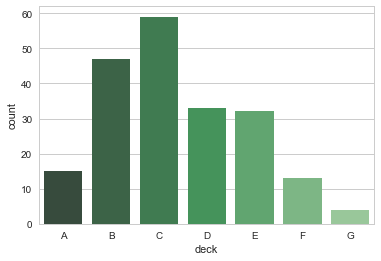

In [44]:
# 统计不同的甲板上的人员生存人数
sns.countplot(x='deck',data=titanic,palette='Greens_d')

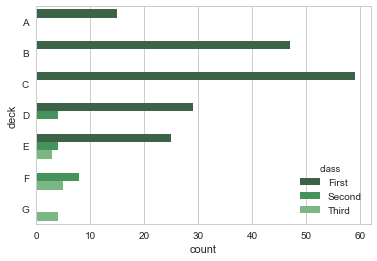

In [47]:
# 加入 class的hue变量，并横过来展示
sns.countplot(y='deck',hue='class',data=titanic, palette='Greens_d')

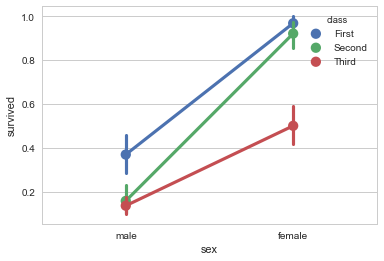

In [48]:
# 点图
sns.pointplot(x='sex',  y = 'survived',hue='class',data=titanic)

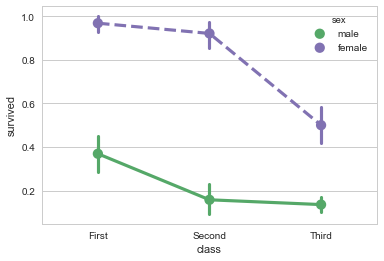

In [50]:
# 使用不同的线条样式绘制
sns.pointplot(x='class', y='survived', hue='sex', data=titanic, palette={'male':'g','female':'m'},makers=['^','o'],linestyles=['-','--'])

### 绘制宽格式的数据

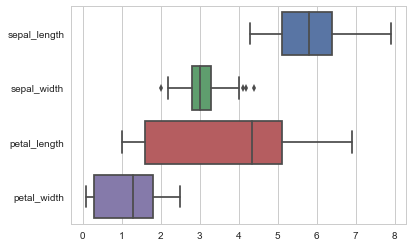

In [51]:
sns.boxplot(data=iris,orient='h')

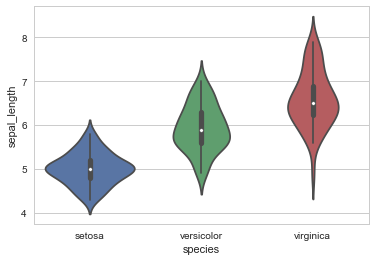

In [52]:
# 还可以接受pandas或者numpy对象的向量
sns.violinplot(x=iris.species, y=iris.sepal_length)

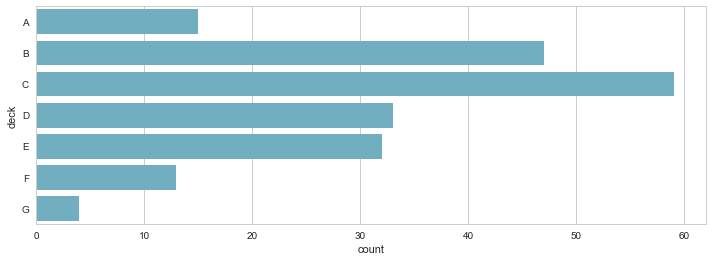

In [54]:
# 控制绘图的大小
f, ax = plt.subplots(figsize=(12,4))

sns.countplot(y='deck',data=titanic,color='c')

## 绘制多层面板分类图
---

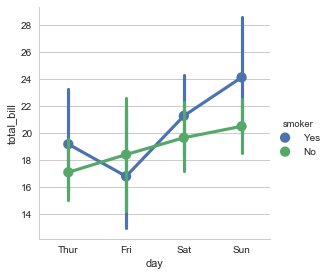

In [55]:

sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips)

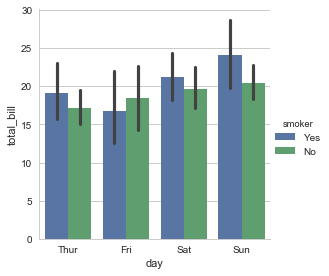

In [57]:
# 设置kind参数，改变图的种类
sns.factorplot(x='day',y='total_bill', hue='smoker', data=tips,kind='bar')

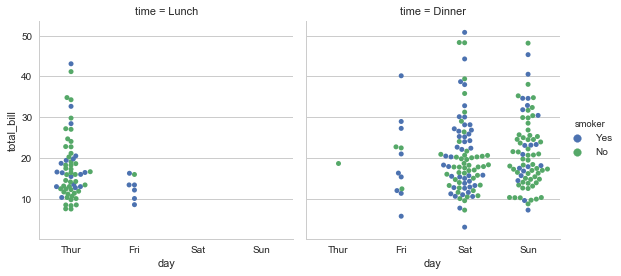

In [58]:
# 绘制多层面板
sns.factorplot(x='day', y='total_bill', hue='smoker', col='time', data=tips, kind='swarm')

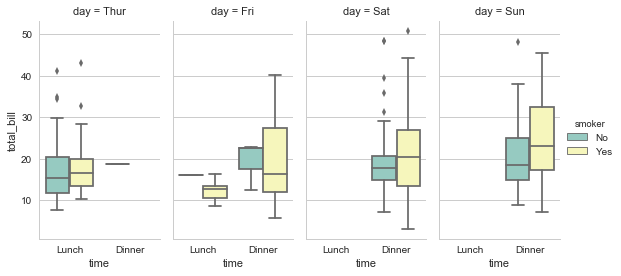

In [59]:
# 
sns.factorplot(x='time',y='total_bill',data=tips,hue='smoker',hue_order=['No','Yes'], col='day', kind='box',size=4,aspect=.5,palette='Set3')

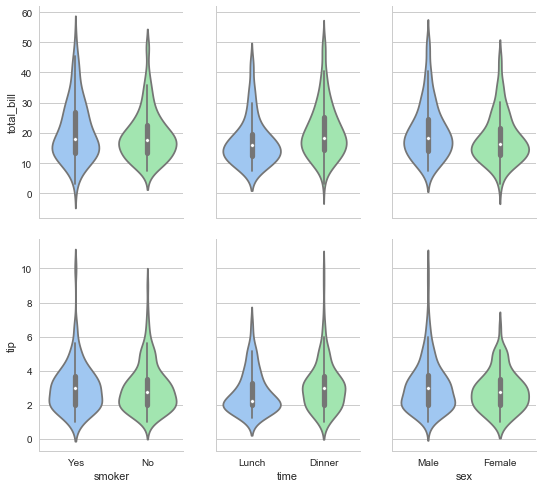

In [61]:
# 网格多变量图层面板

g = sns.PairGrid(tips, x_vars=['smoker','time','sex'],y_vars=['total_bill','tip'],aspect=.75, size=3.5)
g.map(sns.violinplot, palette='pastel')